# Bagging Ensemble 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
df['class'] = encoder.fit_transform(df['class'])

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df = df[['sepal_length', 'petal_length', 'class']]

In [8]:
df

,sepal_length,petal_length,class
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [9]:
df = df.sample(150)

In [10]:
df_train = df.iloc[:90, :].sample(90)
df_val = df.iloc[91:130, :].sample(35)
df_test = df.iloc[131:, :].sample(18)

In [11]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [12]:
90*0.8

72.0

## Case-1 Bagging 

In [13]:
df_bag = df_train.sample(70, replace = True)

In [14]:
X = df_bag.iloc[:,0:2].values
y = df_bag.iloc[:,-1].values

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [16]:
df_bag1 = DecisionTreeClassifier()

In [23]:
def evaluate(model, X, y):
    model.fit(X, y)

    plot_tree(model)
    plt.show()
    plot_decision_regions(X, y,clf = model)
    
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    

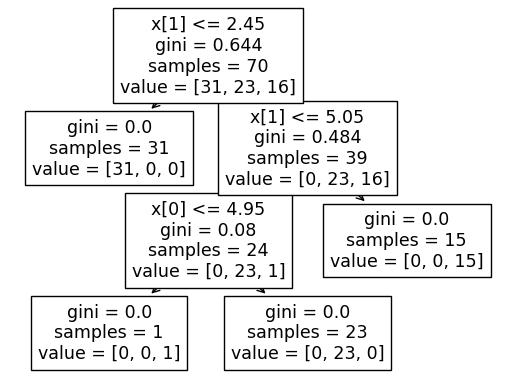

0.9714285714285714


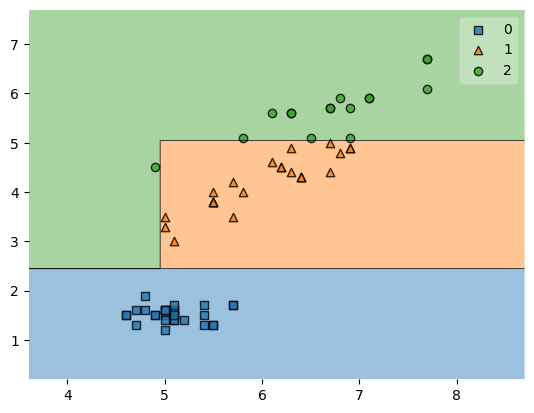

In [24]:
evaluate (df_bag1,X,y)

In [ ]:
df_bag = df_train.sample(20, replace = True)
X = df_bag.iloc[:,0:2].values
y = df_bag.iloc[:,-1].values
df_bag2 = DecisionTreeClassifier()

In [ ]:
evaluate (df_bag2,X,y)

In [ ]:
df_bag = df_train.sample(40, replace = True)
X = df_bag.iloc[:,0:2].values
y = df_bag.iloc[:,-1].values
df_bag3 = DecisionTreeClassifier()

In [ ]:
evaluate (df_bag3,X,y)

## Predict 

In [ ]:
df_test

In [ ]:
print('Predictor 1', df_bag1.predict(np.array([5.1, 1.9]).reshape(1, 2)))
print('Predictor 2', df_bag2.predict(np.array([5.1, 1.9]).reshape(1, 2)))
print('Predictor 3', df_bag3.predict(np.array([5.1, 1.9]).reshape(1, 2)))

## Bagging Classification 

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [ ]:
X, y = make_classification(n_samples=10000, n_features=10, n_informative=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Decision Tree Accuracy is ',accuracy_score(y_test, y_pred))

## Bagging 

In [ ]:
bag = BaggingClassifier(
    estimator= DecisionTreeClassifier(),
    n_estimators= 500,
    max_samples= 0.30,
    bootstrap= True,
    random_state=44
)

In [ ]:
bag.fit(X_train, y_train)

In [ ]:
y_pred = bag.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

## Bagging using SVM

In [ ]:
bag = BaggingClassifier(
    estimator= SVC(),
    n_estimators= 500,
    max_samples= 0.30,
    bootstrap= True,
    random_state=44
)

In [ ]:
bag.fit(X_train, y_train)

In [ ]:
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)

## Pasting

In [ ]:
bag = BaggingClassifier(
    estimator= DecisionTreeClassifier(),
    n_estimators= 500,
    max_samples= 0.30,
    bootstrap= False,
    random_state=44,
    verbose = 1, 
    n_jobs = -1
)

In [ ]:
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)

## Random Subspaces

In [ ]:
bag = BaggingClassifier(
    estimator= DecisionTreeClassifier(),
    n_estimators= 500,
    max_samples= 1.0,
    bootstrap= False,
    max_features= 0.5,
    bootstrap_features= True,
    random_state=44,
    verbose = 1, 
    n_jobs = -1
)

In [ ]:
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)

## Random Patches

In [ ]:
bag = BaggingClassifier(
    estimator= DecisionTreeClassifier(),
    n_estimators= 500,
    max_samples= 0.25,
    bootstrap= True,
    max_features= 0.5,
    bootstrap_features= True,
    random_state=44,
    verbose = 1, 
    n_jobs = -1
)

In [ ]:
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)

## OOB Score

In [ ]:
bag = BaggingClassifier(
    estimator= DecisionTreeClassifier(),
    n_estimators= 500,
    max_samples= 0.25,
    bootstrap= True,
    oob_score= True,
    random_state=44,
    verbose = 1, 
    n_jobs = -1
)

In [ ]:
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)


In [ ]:
bag.oob_score_

# Bagging Regressor

In [ ]:
df = pd.read_csv('Boston.csv')

In [ ]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [ ]:
print('R2 Score for LR ', r2_score(y_test, y_pred1))
print('R2 Score for DT ', r2_score(y_test, y_pred2))
print('R2 Score for KNN ', r2_score(y_test, y_pred3))

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_regressor = BaggingRegressor(n_estimators=500, random_state=1)
bag_regressor.fit(X_train, y_train)

In [ ]:
y_preds = bag_regressor.predict(X_test)

In [ ]:
print('R2 Score for Bagging ', r2_score(y_test, y_preds))